In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, balanced_accuracy_score
from sklearn.preprocessing import LabelEncoder

from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer


In [2]:
df = pd.read_csv("Negotiation_Bargaining_Dataset_SMOTE_Manual.csv")

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (3026, 10)


,Negotiation_ID,Product_Name,Listed_Price,Offered_Price,Final_Price,Discount_%,Buyer_Message,Seller_Message,Sentiment,Outcome
0,NEG0001,Kurta,8305.0,6560.0,7076.0,14.80,"I’m a regular customer, please give a better d...","If you buy more, I can give a small discount.",Neutral,Accepted
1,NEG0002,Plumbing,6095.0,4405.0,4405.0,27.73,Can you please lower the price a bit?,"Okay, I can reduce a little for you.",Neutral,Accepted
2,NEG0003,Home Painting,8940.0,8206.0,8206.0,8.21,Is there any discount if I buy more?,"Sorry, the price is already discounted.",Negative,Accepted
3,NEG0004,Saree,1941.0,1173.0,1491.0,23.18,Can you make it a round number?,This is the best price I can offer.,Negative,Pending
4,NEG0005,Bag,1932.0,1655.0,1655.0,14.34,"That's too expensive, I can pay less.",This is the best price I can offer.,Negative,Accepted


In [3]:
df.describe()

,Listed_Price,Offered_Price,Final_Price,Discount_%
count,3026.000000,3026.000000,3026.000000,3026.000000
mean,5309.315153,3862.661301,4426.572723,16.695484
std,2802.476793,2206.271273,2474.521043,12.209806
min,500.000000,320.000000,320.000000,0.040000
25%,2991.848744,2007.000000,2354.729878,6.872342
50%,5204.341289,3682.625992,4124.000000,13.291218
75%,7876.250000,5568.000000,6422.836622,25.281287
max,10000.000000,9137.000000,9609.000000,49.990000


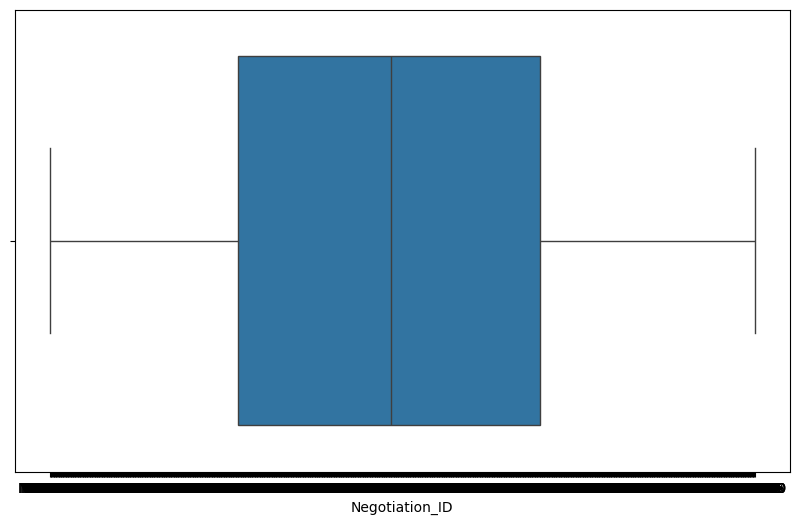

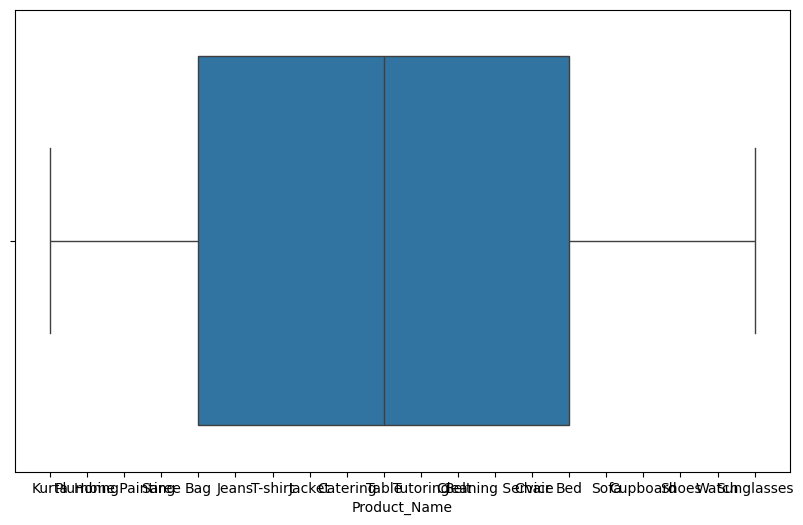

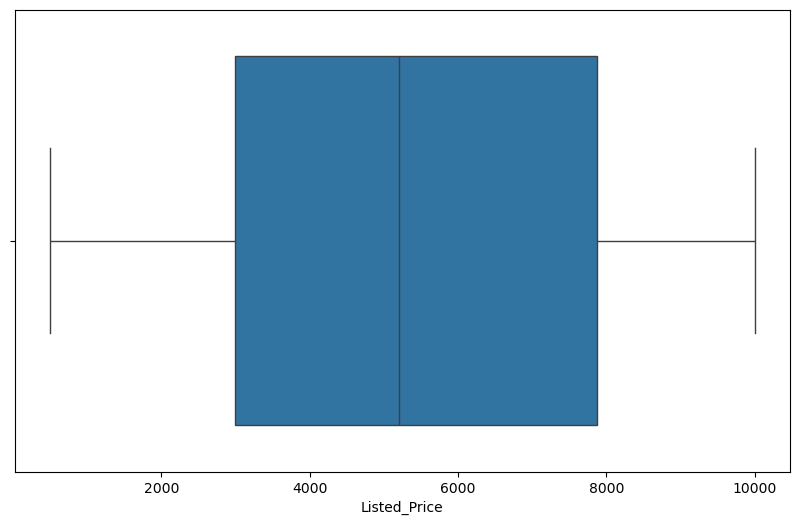

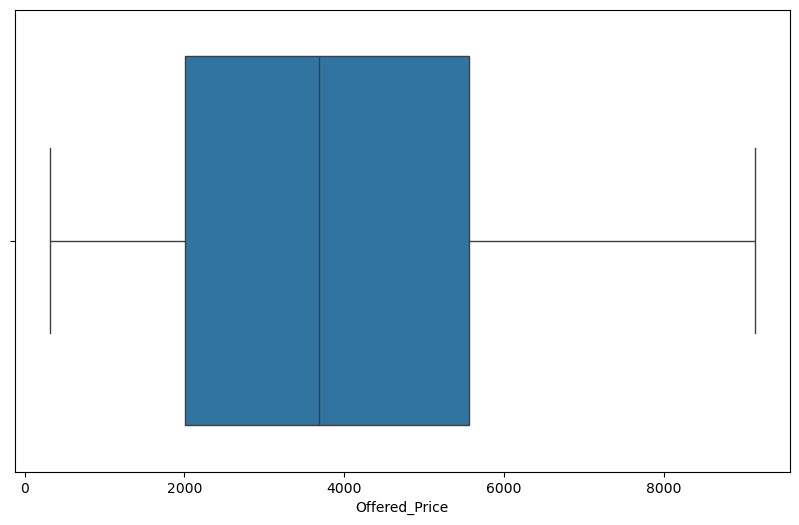

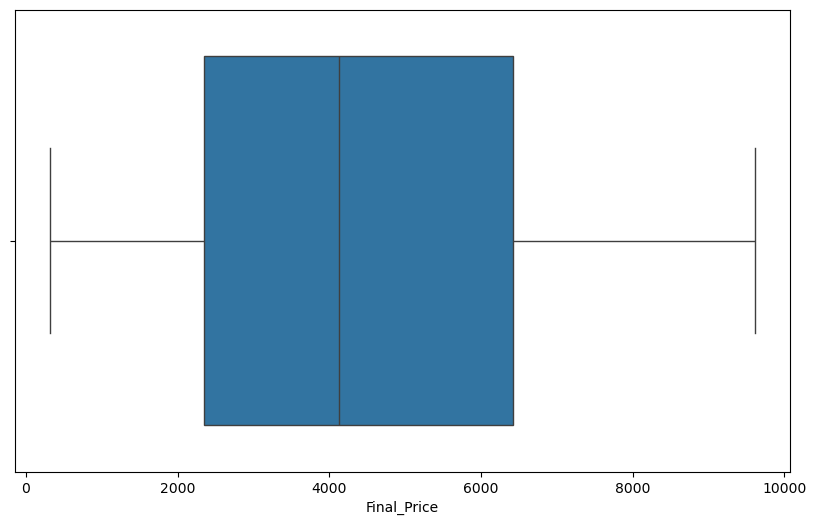

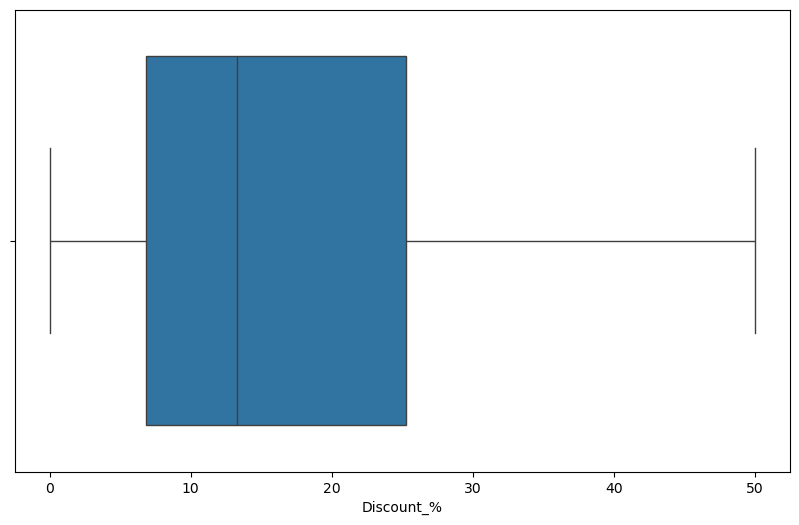

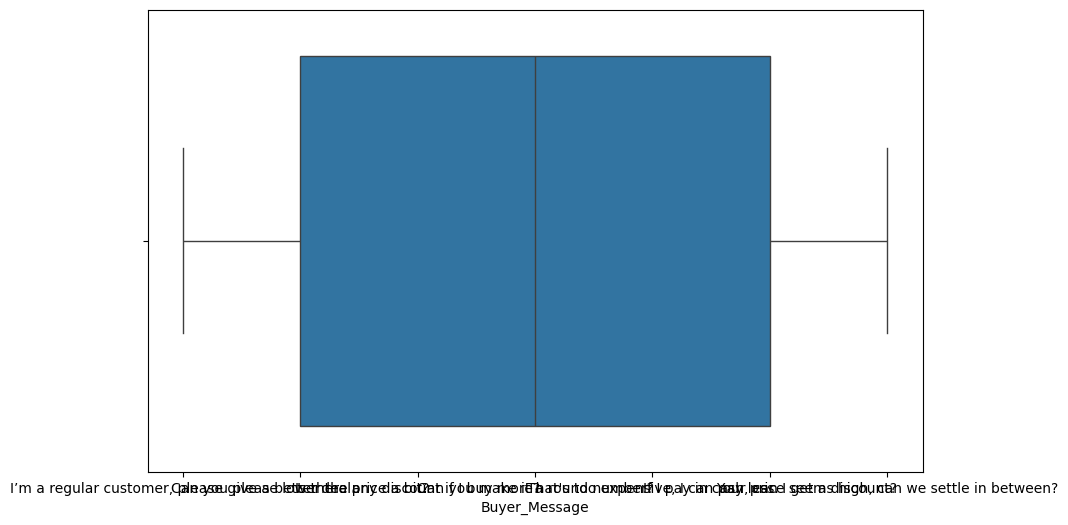

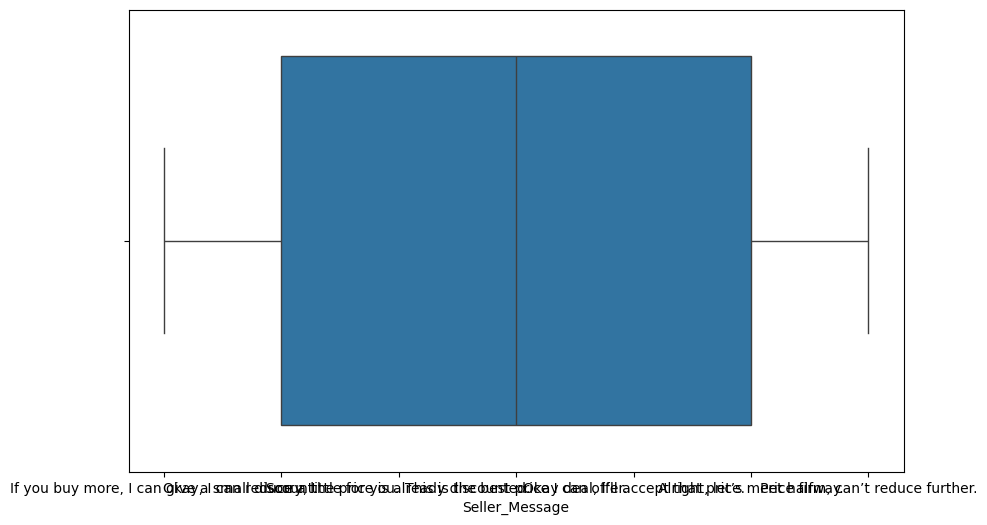

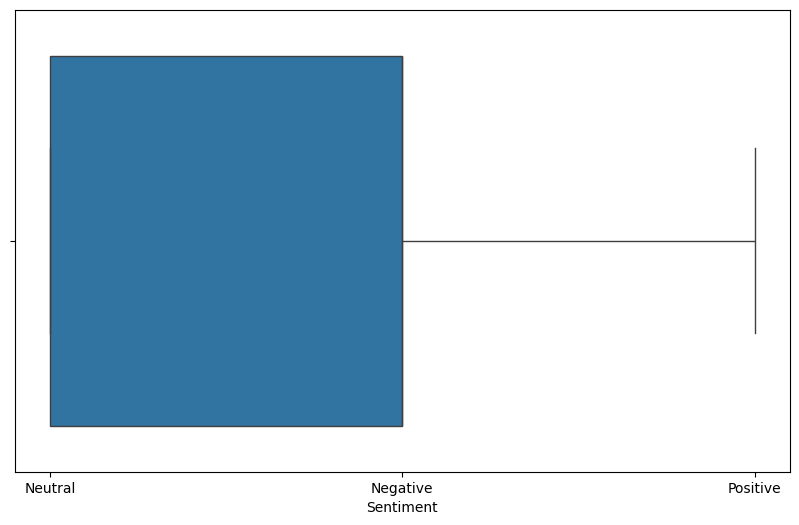

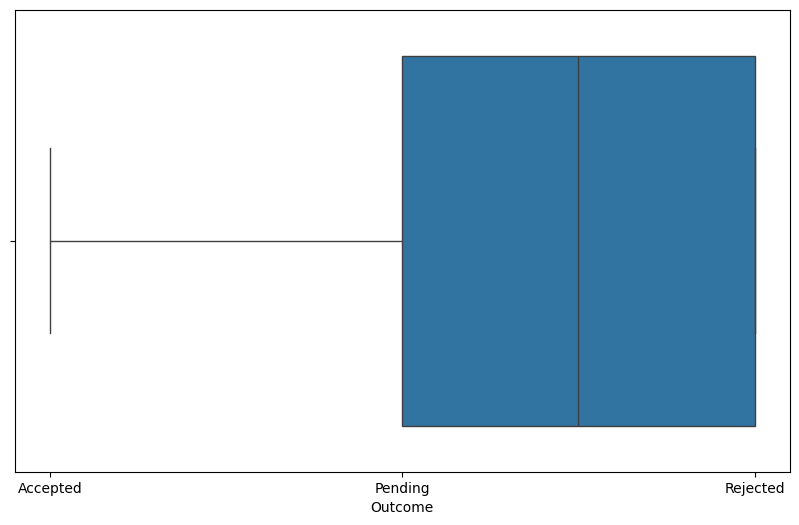

In [4]:
col = df.columns

for c in col:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=c, data=df)

In [5]:
df.isna().sum()

Negotiation_ID    0
Product_Name      0
Listed_Price      0
Offered_Price     0
Final_Price       0
Discount_%        0
Buyer_Message     0
Seller_Message    0
Sentiment         0
Outcome           0
dtype: int64

In [6]:
 X = df.drop('Outcome', axis=1)
 y = df['Outcome']

In [7]:
X

,Negotiation_ID,Product_Name,Listed_Price,Offered_Price,Final_Price,Discount_%,Buyer_Message,Seller_Message,Sentiment
0,NEG0001,Kurta,8305.000000,6560.000000,7076.000000,14.800000,"I’m a regular customer, please give a better d...","If you buy more, I can give a small discount.",Neutral
1,NEG0002,Plumbing,6095.000000,4405.000000,4405.000000,27.730000,Can you please lower the price a bit?,"Okay, I can reduce a little for you.",Neutral
2,NEG0003,Home Painting,8940.000000,8206.000000,8206.000000,8.210000,Is there any discount if I buy more?,"Sorry, the price is already discounted.",Negative
3,NEG0004,Saree,1941.000000,1173.000000,1491.000000,23.180000,Can you make it a round number?,This is the best price I can offer.,Negative
4,NEG0005,Bag,1932.000000,1655.000000,1655.000000,14.340000,"That's too expensive, I can pay less.",This is the best price I can offer.,Negative
...,...,...,...,...,...,...,...,...,...
3021,NEG0419,Home Painting,3472.569258,2263.015136,2756.960842,20.587019,Is there any discount if I buy more?,"Price firm, can’t reduce further.",Neutral
3022,NEG0567,Saree,9436.000000,8058.000000,9182.000000,2.690000,"I’m a regular customer, please give a better d...",This is the best price I can offer.,Negative
3023,NEG0285,Sofa,6511.000000,4033.000000,4159.000000,36.120000,"Your price seems high, can we settle in between?","Okay, I can reduce a little for you.",Negative
3024,NEG0324,Home Painting,9825.374432,8427.345111,9210.914546,6.253920,"I’m a regular customer, please give a better d...","Price firm, can’t reduce further.",Neutral


In [8]:
label_encoder = LabelEncoder()
df['Outcome'] = label_encoder.fit_transform(df['Outcome'])

In [9]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [10]:
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))

In [11]:
df.columns

Index(['Negotiation_ID', 'Product_Name', 'Listed_Price', 'Offered_Price',
       'Final_Price', 'Discount_%', 'Buyer_Message', 'Seller_Message',
       'Sentiment', 'Outcome'],
      dtype='object')

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import joblib

# Load dataset
df = pd.read_csv("Negotiation_Bargaining_Dataset_SMOTE_Manual.csv")

# Create encoders
product_encoder = LabelEncoder()
sentiment_encoder = LabelEncoder()
outcome_encoder = LabelEncoder()

# Encode required columns
df["Product_Encoded"] = product_encoder.fit_transform(df["Product_Name"])
df["Sentiment_Encoded"] = sentiment_encoder.fit_transform(df["Sentiment"])
df["Outcome_Encoded"] = outcome_encoder.fit_transform(df["Outcome"])

# Select features
X = df[["Listed_Price", "Offered_Price", "Final_Price", "Discount_%",
        "Product_Encoded", "Sentiment_Encoded"]]

y = df["Outcome_Encoded"]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Save model + encoders + scaler
joblib.dump(model, "Negotiation_MLproject.joblib")
joblib.dump(product_encoder, "product_encoder.joblib")
joblib.dump(sentiment_encoder, "sentiment_encoder.joblib")
joblib.dump(outcome_encoder, "outcome_encoder.joblib")
joblib.dump(scaler, "scaler.joblib")

print("Model + encoders saved successfully!")


Model + encoders saved successfully!


In [14]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
}

best_model = None
best_acc = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"\n{name} Accuracy: {acc*100:.2f}%")
    if acc > best_acc:
        best_acc = acc
        best_model = model


Logistic Regression Accuracy: 47.19%

Random Forest Accuracy: 86.14%


In [15]:
print(f"Best Model: {best_model.__class__.__name__}")
print(f" Accuracy: {best_acc*100:.2f}%")



Best Model: RandomForestClassifier
 Accuracy: 86.14%


In [16]:
y_pred = best_model.predict(X_test)
print("", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

               precision    recall  f1-score   support

    Accepted       0.86      0.61      0.71       137
     Pending       0.86      0.86      0.86       167
    Rejected       0.86      0.97      0.91       302

    accuracy                           0.86       606
   macro avg       0.86      0.82      0.83       606
weighted avg       0.86      0.86      0.85       606



In [17]:
target = "Outcome"

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Train:", X_train.shape)
print("Test :", X_test.shape)


Train: (2420, 12)
Test : (606, 12)


In [18]:
cat_features = [col for col in X.columns if X[col].dtype == "object"]
cat_features


['Negotiation_ID',
 'Product_Name',
 'Buyer_Message',
 'Seller_Message',
 'Sentiment']

In [19]:
model = CatBoostClassifier(
    iterations=800,
    learning_rate=0.05,
    depth=8,
    loss_function='MultiClass',
    eval_metric='Accuracy',
    random_seed=42,
    verbose=100
)

model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test),
    verbose=100
)


0:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 206ms	remaining: 2m 44s
100:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 5.6s	remaining: 38.7s
200:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 13s	remaining: 38.8s
300:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 20.8s	remaining: 34.5s
400:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 29.6s	remaining: 29.5s
500:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 37.7s	remaining: 22.5s
600:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 45.3s	remaining: 15s
700:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 52.8s	remaining: 7.46s
799:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 2s	remaining: 0us

bestTest = 1
bestIteration = 0

Shrink model to first 1 iterations.


In [20]:
preds = model.predict(X_test).flatten()

print("\n🔹 Accuracy:", accuracy_score(y_test, preds))
print("🔹 Balanced Accuracy:", balanced_accuracy_score(y_test, preds))

print("\nClassification Report:")
print(classification_report(y_test, preds))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, preds))



🔹 Accuracy: 1.0
🔹 Balanced Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

    Accepted       1.00      1.00      1.00       135
     Pending       1.00      1.00      1.00       168
    Rejected       1.00      1.00      1.00       303

    accuracy                           1.00       606
   macro avg       1.00      1.00      1.00       606
weighted avg       1.00      1.00      1.00       606


Confusion Matrix:
[[135   0   0]
 [  0 168   0]
 [  0   0 303]]


In [21]:
importances = model.get_feature_importance()
feat_imp = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feat_imp.head(20)


,Feature,Importance
11,Outcome_Encoded,99.957954
8,Sentiment,0.042046
0,Negotiation_ID,0.000000
1,Product_Name,0.000000
3,Offered_Price,0.000000
2,Listed_Price,0.000000
4,Final_Price,0.000000
5,Discount_%,0.000000
7,Seller_Message,0.000000
6,Buyer_Message,0.000000


In [22]:
import joblib

joblib.dump(model, "Negotiation_MLproject.joblib")
joblib.dump(product_encoder, "product_encoder.joblib")
joblib.dump(sentiment_encoder, "sentiment_encoder.joblib")


['sentiment_encoder.joblib']

In [23]:
import joblib
joblib.dump(best_model, "Negotiation_MLproject.joblib")
joblib.dump(outcome_encoder, "outcome_encoder.joblib")
print("✅ Model saved as Negotiation_MLproject.joblib")

✅ Model saved as Negotiation_MLproject.joblib
